In [3]:
import numpy as np
import matplotlib.pyplot as plt

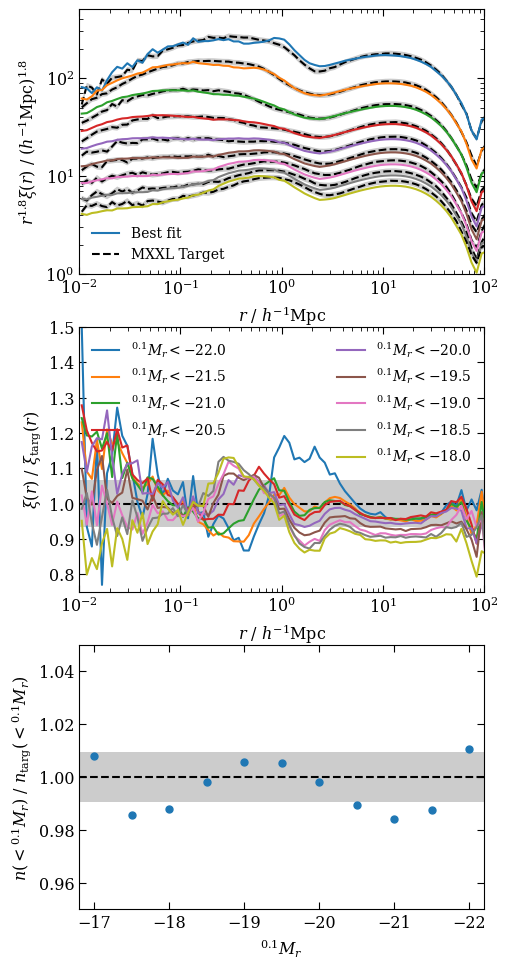

In [29]:
# set font
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# initialize subplots
f, ax = plt.subplots(3,1, figsize=(5,10)) 
plt.subplots_adjust(top = 0.98, bottom = 0.08, right = 0.95, left = 0.14)
for i in range(3):
    ax[i].tick_params(direction="in", top=True, right=True, length=5, labelsize=11.5)
    ax[i].tick_params(which="minor", direction="in", top=True, right=True, length=3, labelsize=11.5)

# target clustering and number densities
target_2pcf = np.genfromtxt('data/target/xi_r_mxxl.txt')
target_num_den = np.loadtxt('data/target/target_num_den_rescaled.txt') #cosmology rescaling already applied to these number densities
cosmo_rescaling = np.loadtxt('data/target/cosmology_rescaling_factor_xi_zel8_c000_ph000.txt') #cosmology rescaling factor to apply to clustering    

# best-fitting clustering and number densities
num_den = np.loadtxt('data/c000_ph000/num_den_fit_c000_ph000.txt')
xi = np.loadtxt('data/c000_ph000/xi_r_best_fit_c000_ph000.txt')
r = xi[:,0]
magnitudes = num_den[:,0]

ax[1].axhline(1, c='k', ls="--")
ax[2].axhline(1, c='k', ls="--")

# plot the clustering
for i in range(9):    
    #offsets between curves
    offset = 10**((4-i)*0.1)
    
    #scale wp(rp) by rp**a
    a=1.8
    
    #plot target clustering in upper panel
    ax[0].plot(r, r**a*target_2pcf[:,i+1]*cosmo_rescaling*offset, c="k", ls="--")
    ax[0].fill_between(r, r**a*target_2pcf[:,i+1]*(1+err)*cosmo_rescaling*offset,
                          r**a*target_2pcf[:,i+1]*(1-err)*cosmo_rescaling*offset, 
                       facecolor="k", alpha=0.2)
    
    #plot best-fitting clustering in upper panel
    ax[0].plot(r, r**a*xi[:,i+1]*offset, c="C%i"%i)
    
    #plot ratio of clustering in lower panel
    ax[1].plot(r, (xi[:,i+1]/target_2pcf[:,i+1])/cosmo_rescaling)
    
err = 0.0656 #error in clustering assumed when fitting
x = np.arange(-3,3.1)
y = np.ones(len(x))
ax[1].fill_between(10**x, y+err, y-err, alpha=0.2, facecolor='k', zorder=-100)

    
# plot the number densities
num_den_err = 0.00938
ax[2].scatter(magnitudes, 10**num_den[:,1]/10**target_num_den[:,1], s=25, zorder=100)
x = np.arange(-25,-15)
ax[2].fill_between(x, 1-num_den_err, 1+num_den_err, alpha=0.2, facecolor='k',zorder=-100)


# add labels and legends
ax[0].plot([],[],c='C0',label='Best fit')
ax[0].plot([],[],c='k',ls='--', label='MXXL Target')
ax[0].legend(loc='lower left').draw_frame(False)

for i in range(4):
    ax[1].plot([],[],c="C%i"%i, label=r"$^{0.1}M_r < %.1f$"%magnitudes[i])

leg1 = ax[1].legend(loc="upper left", fontsize=10)
leg1.draw_frame(False)
    
line0, = ax[1].plot([],[],c="C4", ls="-")
line1, = ax[1].plot([],[],c="C5", ls="-")
line2, = ax[1].plot([],[],c="C6", ls="-")
line3, = ax[1].plot([],[],c="C7", ls="-")
line4, = ax[1].plot([],[],c="C8", ls="-")
leg2 = ax[1].legend([line0, line1, line2, line3, line4],
                    [r"$^{0.1}M_r < %.1f$"%magnitudes[4], r"$^{0.1}M_r < %.1f$"%magnitudes[5], r"$^{0.1}M_r < %.1f$"%magnitudes[6], r"$^{0.1}M_r < %.1f$"%magnitudes[7], r"$^{0.1}M_r < %.1f$"%magnitudes[8]], 
                      fontsize=10, loc='upper right')
leg2.draw_frame(False)    
ax[1].add_artist(leg1)

# set axis limits and labels
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_ylim(1,5e2)
ax[0].set_xlim(1e-2,1e2)

ax[1].set_xscale("log")
ax[1].set_ylim(0.75,1.5)
ax[1].set_xlim(1e-2,1e2)

ax[2].set_xlim(-16.8, -22.2)
ax[2].set_ylim(0.95, 1.05)

ax[0].set_xlabel(r"$r \ / \ h^{-1}\mathrm{Mpc}$", fontsize=11.5)
ax[0].set_ylabel(r"$r^{1.8}\xi(r) \ / \ (h^{-1}\mathrm{Mpc})^{1.8}$", fontsize=11.5)
ax[1].set_xlabel(r"$r \ / \ h^{-1}\mathrm{Mpc}$", fontsize=11.5)
ax[1].set_ylabel(r"$\xi(r) \ / \ \xi_\mathrm{targ}(r)$", fontsize=11.5)
ax[2].set_xlabel(r"${}^{0.1}M_r$", fontsize=11.5)
ax[2].set_ylabel(r"$n(< {}^{0.1}M_r) \ / \ n_\mathrm{targ}(< {}^{0.1}M_r)$", fontsize=11.5)

# save the figure as a pdf
plt.savefig("pdf/Figure_6.pdf", dpi=300)